# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
renda = (pd.read_csv('https://raw.githubusercontent.com/paulobrunini/EBAC/main/previsao_de_renda.csv'))

In [8]:
renda.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1, inplace=True)

In [9]:
renda.dropna(inplace=True)

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [10]:
# 1. 
x = renda.drop(columns='renda', axis = 1)
y = renda['renda']

In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=100)

In [12]:
y_treino  = pd.Series(data = y_treino, name = 'renda')

In [13]:
x_treino.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia'],
      dtype='object')

In [14]:
concat = pd.concat([x_treino,y_treino], axis =1)

In [16]:
print(x_treino.shape)
print(y_treino.shape)
concat.columns


(9320, 11)
(9320,)


Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [17]:
y1, x1 = patsy.dmatrices('np.log(renda) ~ sexo+posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+' 
                         'estado_civil+tipo_residencia+idade+tempo_emprego+qt_pessoas_residencia'
                         , data = concat)

In [18]:
alfa =  [0 , 0.001, 0.005, 0.01, 0.05, 0.1 ]
results = []
for a in alfa:
    reg1 = sm.OLS(y1,x1).fit_regularized( method = 'elastic_net'
                                       , refit = True
                                       , L1_wt = 0.0000000001
                                       , alpha = a)
    results.append(reg1)

In [19]:
print(results[0].summary())
print(results[1].summary())
print(results[2].summary())
print(results[3].summary())
print(results[4].summary())
print(results[5].summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:57:38   Log-Likelihood:                -10198.
No. Observations:                9320   AIC:                         2.045e+04
Df Residuals:                    9295   BIC:                         2.063e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

##### sem diferenças - uma ressalva com o lasso - quanto maior o alpha menor é o R²


In [20]:
x_treino = pd.get_dummies(data = x_treino, drop_first= True)

In [21]:
x_treino.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'sexo_M',
       'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')

In [22]:
x_treino.rename(columns={'tipo_renda_Servidor público': 'tipo_renda_Servidor_público',
                             'educacao_Pós graduação':'educacao_Pós_graduação',
                             'educacao_Superior completo':'educacao_Superior_completo',
                             'educacao_Superior incompleto':'educacao_Superior_incompleto',
                             'tipo_residencia_Com os pais':'tipo_residencia_Com_os_pais'},inplace=True)

In [23]:
X = pd.get_dummies(data = x_treino , columns=['posse_de_veiculo','posse_de_imovel'], drop_first=True)

In [24]:
X

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor_público,educacao_Pós_graduação,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,posse_de_veiculo_True,posse_de_imovel_True
3889,0,50,3.441096,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14483,0,52,2.745205,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
762,0,38,6.539726,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3078,0,27,7.624658,2.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
10423,0,47,4.550685,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,37,0.265753,3.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
14610,1,41,4.016438,3.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
9679,2,36,18.043836,4.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8373,0,37,2.701370,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
y = y_treino

In [26]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 2.85907e-248
#############
['tempo_emprego', 'sexo_M']
Add  idade                          with p-value 6.86247e-06
#############
['tempo_emprego', 'sexo_M', 'idade']
Add  tipo_renda_Empresário          with p-value 3.02238e-05
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário']
Add  educacao_Superior_completo     with p-value 0.00798815
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior_completo']
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior_completo']
resulting features:
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior_completo']


In [27]:
concat1 = pd.concat([X,y], axis =1)

In [28]:
y2,x2= patsy.dmatrices('np.log(renda) ~ tempo_emprego+sexo_M+idade+tipo_renda_Empresário+educacao_Superior_completo', data = concat1 )

In [29]:
reg2 = sm.OLS(y2,x2).fit()

In [30]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:01:19   Log-Likelihood:                -10226.
No. Observations:                9320   AIC:                         2.046e+04
Df Residuals:                    9314   BIC:                         2.051e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1994      0.037    196.052      0.000       7.127       7.271
tempo_emprego                  0.0616      0.001     51.795      0.000       0.059       0.064
sexo_M                         0.7962      0.016     50.160      0.000       0.765       0.827
idade                          0.0054      0.001      6.345      0.000       0.004       0.007
tipo_renda_Empresário          0.1422      0.017      8.437      0.000       0.109       0.175
educacao_Superior_completo     0.1048      0.016      6.713      0.000       0.074       0.135
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.203
Skew:                           0.005   Prob(JB):                        0.903
Kurtosis:                       3.021   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### O modelo que deu um melhor resultado de R² foi o ridge

In [31]:
y3,x3= patsy.dmatrices('np.log(renda) ~ tempo_emprego+sexo_M+idade+tipo_renda_Empresário+educacao_Superior_completo', data = concat1 )

In [32]:
reg3 = sm.OLS(y3,x3).fit_regularized(method = 'elastic_net'
                                       , refit = True
                                       , L1_wt = 0.001
                                       , alpha = 0)

In [33]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     836.2
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:02:08   Log-Likelihood:                -10226.
No. Observations:                9320   AIC:                         2.047e+04
Df Residuals:                    9314   BIC:                         2.052e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1994      0.037    196.052      0.000       7.127       7.271
tempo_emprego                  0.0616      0.001     51.795      0.000       0.059       0.064
sexo_M                         0.7962      0.016     50.160      0.000       0.765       0.827
idade                          0.0054      0.001      6.345      0.000       0.004       0.007
tipo_renda_Empresário          0.1422      0.017      8.437      0.000       0.109       0.175
educacao_Superior_completo     0.1048      0.016      6.713      0.000       0.074       0.135
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.203
Skew:                           0.005   Prob(JB):                        0.903
Kurtosis:                       3.021   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

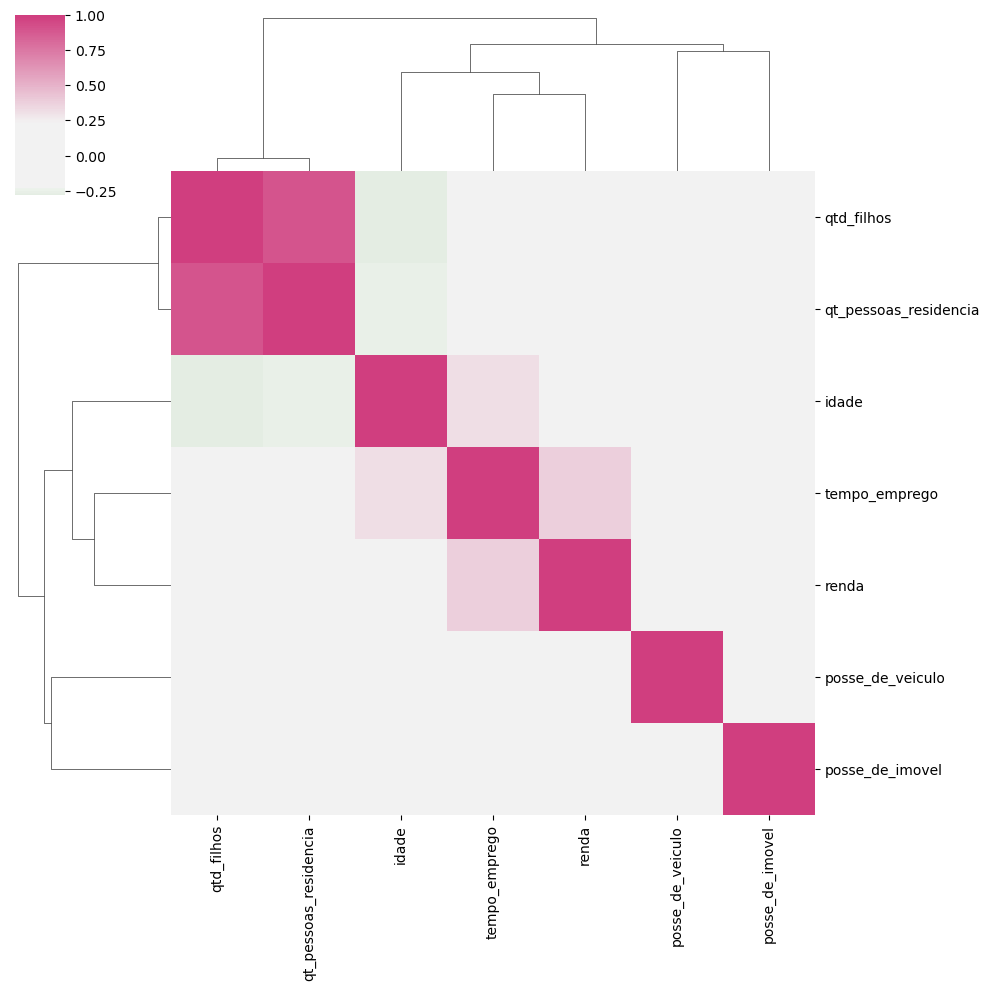

In [34]:
#utilizar o clustermap para verificar as melhores correlações
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(concat.corr(), figsize=(10, 10), center = 0, cmap=cmap);

##### vemos que renda se relaciona muito bem apenas com tempo_empego

In [35]:
arv1 = DecisionTreeRegressor(max_depth=3)

In [36]:
arv1.fit(x_treino,y_treino)

DecisionTreeRegressor(max_depth=3)

In [37]:
r_2=arv1.score(x_treino, y_treino)
round(r_2,2)

0.42

##### # R² deu uma boa melhorada, vamos tenta melhorar o modelo verificando o ccp_alpha


In [38]:
path = arv1.cost_complexity_pruning_path(x_treino, y_treino)

In [39]:
path.ccp_alphas

array([       0.        ,   378510.964796  ,   641867.26178052,
        3159550.59138362,  3467707.48621313,  7613160.90207768,
       10053706.34156496])

In [40]:
arvores = [] # lista de árvores, inicialmente vazia

for ccp_a in path.ccp_alphas:
    clf = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp_a)
    clf.fit(x_treino,y_treino)
    arvores.append(clf)

In [41]:
arvores

[DecisionTreeRegressor(random_state=100),
 DecisionTreeRegressor(ccp_alpha=378510.964796002, random_state=100),
 DecisionTreeRegressor(ccp_alpha=641867.2617805162, random_state=100),
 DecisionTreeRegressor(ccp_alpha=3159550.591383625, random_state=100),
 DecisionTreeRegressor(ccp_alpha=3467707.486213129, random_state=100),
 DecisionTreeRegressor(ccp_alpha=7613160.902077682, random_state=100),
 DecisionTreeRegressor(ccp_alpha=10053706.341564965, random_state=100)]

In [42]:
treino = []
for arvore in arvores:
    y_chapeu = arvore.predict(x_treino)
    t = mean_squared_error(y_treino,y_chapeu)
    treino.append(t)

In [43]:
y_teste  = pd.Series(data = y_teste, name = 'renda' )

In [44]:
x_teste = pd.get_dummies(data = x_teste, drop_first= True)

In [45]:
x_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 3740 to 10639
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               3107 non-null   bool   
 1   posse_de_imovel                3107 non-null   bool   
 2   qtd_filhos                     3107 non-null   int64  
 3   idade                          3107 non-null   int64  
 4   tempo_emprego                  3107 non-null   float64
 5   qt_pessoas_residencia          3107 non-null   float64
 6   sexo_M                         3107 non-null   uint8  
 7   tipo_renda_Bolsista            3107 non-null   uint8  
 8   tipo_renda_Empresário          3107 non-null   uint8  
 9   tipo_renda_Pensionista         3107 non-null   uint8  
 10  tipo_renda_Servidor público    3107 non-null   uint8  
 11  educacao_Pós graduação         3107 non-null   uint8  
 12  educacao_Secundário            3107 non-null

In [46]:
x_teste = pd.get_dummies(data = x_teste, columns=['posse_de_veiculo','posse_de_imovel'], drop_first=True)


In [47]:
teste = []
for arvore in arvores:
    y_chapeu = arvore.predict(x_teste)
    t = mean_squared_error(y_teste,y_chapeu)
    teste.append(t)

/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- educacao_Pós graduação
- educacao_Superior completo
- educacao_Superior incompleto
- posse_de_imovel_True
- posse_de_veiculo_True
- ...
Feature names seen at fit time, yet now missing:
- educacao_Pós_graduação
- educacao_Superior_completo
- educacao_Superior_incompleto
- posse_de_imovel
- posse_de_veiculo
- ...

  warnings.warn(message, FutureWarning)
/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- educacao_Pós graduação
- educacao_Superior completo
- educacao_Superior incompleto
- posse_de_imovel_True
- posse_de_veiculo_True
- ...
Feature names seen at fit 

In [48]:
len(treino)

7

In [49]:
len(teste)

7

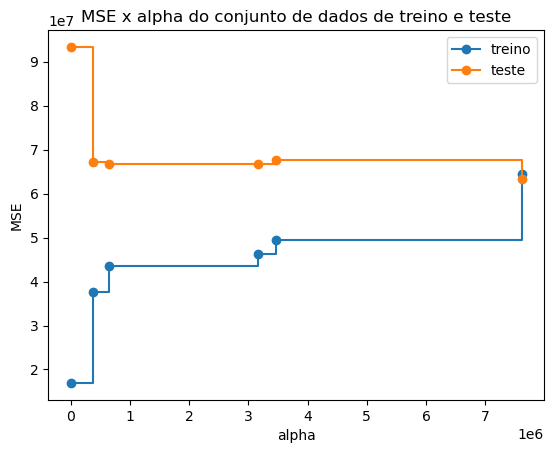

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(path.ccp_alphas[:-1], treino[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(path.ccp_alphas[:-1], teste[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [51]:
arv1_post_prunning = DecisionTreeRegressor(max_depth=7, ccp_alpha=0.2)

arv1_post_prunning.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.2, max_depth=7)

In [52]:
r_2=arv1_post_prunning.score(x_treino, y_treino)
round(r_2,2)

0.61

In [53]:
arv2_post_prunning = DecisionTreeRegressor(max_depth=10, ccp_alpha=5)

arv2_post_prunning.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=5, max_depth=10)

In [54]:
r_2=arv2_post_prunning.score(x_treino, y_treino)
round(r_2,2)

0.7

##### # se aumentar mais a profundidade o R² ficará maior, mas aumentará também a possibilidade de overfitting